### 1. 绘制 `sin` 正弦信号

In [40]:
import numpy as np
from matplotlib import pyplot as plt
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [41]:
x = np.linspace(start=0, stop=6 * np.pi, num=1000)

In [42]:
y = 0.5 * np.sin(3 * x + 0.8)

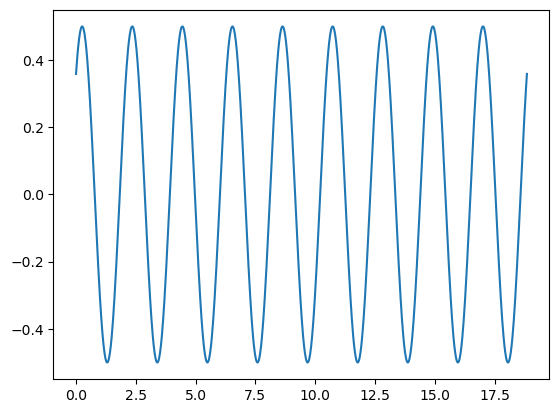

In [43]:
plt.plot(x, y)

In [44]:
# 建模思想：输入x，输出 y

In [45]:
import torch
from torch import nn

In [46]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(in_features=1, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        x = self.linear(x)
        return x

In [47]:
X = torch.tensor(data=x.reshape(-1, 1), dtype=torch.float32)
Y = torch.tensor(data=y.reshape(-1, 1), dtype=torch.float32)

In [51]:
model = Model()
epochs = 10000
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

In [52]:
def train():
    for epoch in range(epochs):
        # 正向传播
        y_pred = model(X)
        # 评估
        loss = loss_fn(y_pred, Y)
        # 反向传播
        loss.backward()
        # 优化一步
        optimizer.step()
        # 清空梯度
        optimizer.zero_grad()
        if epoch % 5000:
            print(loss.item())

In [53]:
train()

0.9895884394645691
0.2130727469921112
0.25595471262931824
0.44197359681129456
0.29441624879837036
0.13850946724414825
0.1425529271364212
0.22037631273269653
0.24533230066299438
0.19447171688079834
0.13472747802734375
0.12454116344451904
0.15682336688041687
0.18312929570674896
0.17459918558597565
0.14417730271816254
0.12261100858449936
0.12400592118501663
0.14009547233581543
0.14782612025737762
0.13992008566856384
0.12580139935016632
0.11868392676115036
0.12325228005647659
0.1309133917093277
0.13228824734687805
0.12703944742679596
0.12044062465429306
0.1183302029967308
0.12127940356731415
0.1250026673078537
0.1252678781747818
0.12289045751094818
0.11842163652181625
0.11801151186227798
0.11981461197137833
0.12122062593698502
0.1205337718129158
0.11847317218780518
0.1171470358967781
0.11755995452404022
0.11869945377111435
0.11885920912027359
0.11780039221048355
0.11669350415468216
0.11654116958379745
0.11711812019348145
0.11742020398378372
0.11695913970470428
0.11620418727397919
0.1158585

In [ ]:
def predict():
    with torch.no_grad():
        

In [17]:
def predict(X):
    if not isinstance(X, torch.Tensor):
        X = torch.tensor(data=X.reshape(-1, 1), dtype=torch.float32)
    else:
        X = X.reshape(-1, 1)
    with torch.no_grad():
        y = model(X).numpy().reshape(-1)
        return y

In [18]:
y_pred = predict(x)

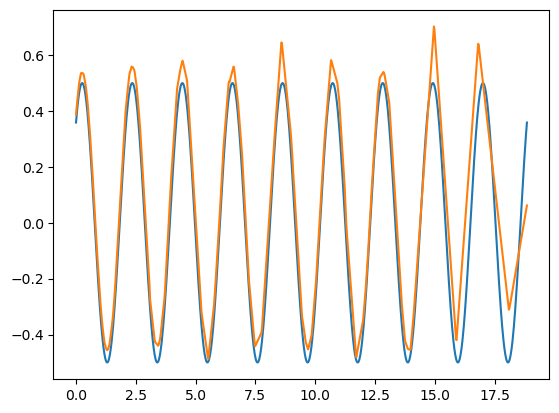

In [19]:
plt.plot(x, y)
plt.plot(x, predict(x))

In [16]:
x = np.linspace(start=-3*np.pi, stop=9 * np.pi, num=1500)
y = 0.5 * np.sin(3 * x + 0.8)

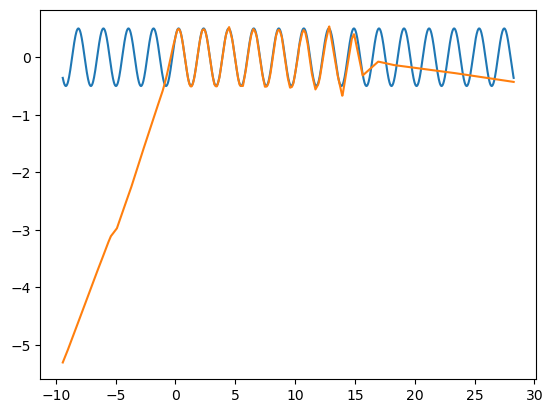

In [17]:
plt.plot(x, y)
plt.plot(x, predict(x))